# Data enginieering - clustering

## Exercise 1: k-means on digits

Use K-means clustering on the MNIST dataset (which can be imported with `from sklearn.datasets import load_digits`) to learn to identify the 10 digits in an unsupervised manner.

1. Plot the `cluster_centers_` (which should be shape `(10,64)`) onto a `8x8` grid (hint: use `kmeans.cluster_centers_.reshape`)
2. Reorganize the clusters so that each of your learned clusters labels overlap with the true label (eg. if the digit 4 has the cluster label 9, you want to remap it to 4). Hint: You can use the statistical mode of your clusters and the real label to match them
3. Now that your cluster labels are matched to the supervised learning labels, check the classification accuracy of your clustering model (accuracy score and confusion matrix). Give a two paragraph interpretation.
4. Use the Fowlkes-Mallows score to evaluate your clustering against the true labels. Give a two paragraph interpretation comparing to your result in #3.

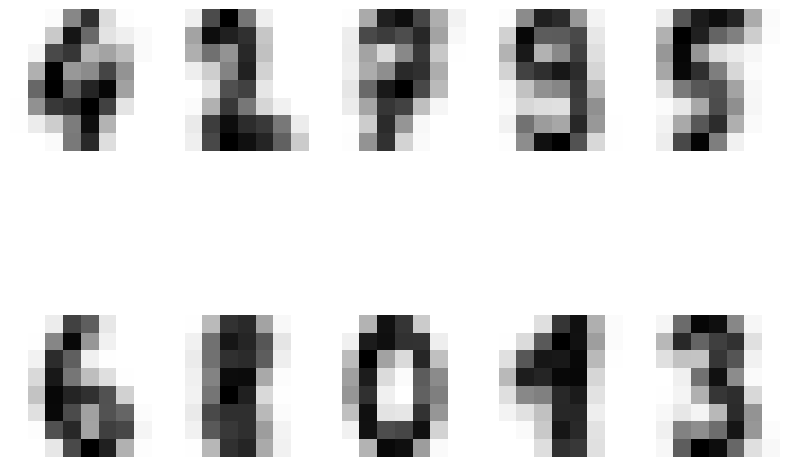

Accuracy: 0.7902058987200891
Confusion Matrix:
[[176   0   0   0   2   0   0   0   0   0]
 [  0  55  24   1   0   1   2   0  99   0]
 [  1   2 148  13   0   0   0   3   8   2]
 [  0   0   0 155   0   2   0   7   7  12]
 [  0   3   0   0 166   0   0   9   3   0]
 [  0   0   0   0   2 129   1   0   0  50]
 [  1   0   0   0   0   0 177   0   3   0]
 [  0   0   0   0   0   5   0 172   2   0]
 [  0   5   3   2   0   5   2   4 101  52]
 [  0  20   0   6   0   5   0   7   1 141]]


0.6967274929573996

In [20]:
# exercise 1
from sklearn.datasets import load_digits
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import fowlkes_mallows_score

# Part 1
# Load the MNIST dataset
digits = load_digits()
X = digits.data
y = digits.target

kmeans = KMeans(n_clusters=10, random_state=64)
kmeans.fit(X)

cluster_centers = kmeans.cluster_centers_.reshape(10, 8, 8)

plt.figure(figsize=(8, 8))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(cluster_centers[i], cmap='binary')
    plt.axis('off')

plt.tight_layout()
plt.show()
# Part 2
cluster_labels = np.zeros_like(kmeans.labels_)
for i in range(10):
    mask = (kmeans.labels_ == i)
    cluster_labels[mask] = np.bincount(y[mask]).argmax()

# Part 3
accuracy = accuracy_score(y, cluster_labels)
confusion_mtx = confusion_matrix(y, cluster_labels)

print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(confusion_mtx)

""" 
In this code, y represents the true labels of the digits, 
and cluster_labels represents the labels obtained from the K-means clustering algorithm.

The accuracy score is calculated using the accuracy_score function from scikit-learn. 
It compares the true labels (y) with the cluster labels (cluster_labels) and returns the ratio of correctly classified instances.
The confusion matrix is computed using the confusion_matrix function from scikit-learn. 
It takes the true labels (y) and the (cluster_labels) as inputs and generates a matrix that summarizes the classification results.
Each row of the matrix represents the instances in a true label, while each column represents the instances in a predicted label.
The diagonal elements of the matrix represent the number of correctly classified instances for each digit, while the off-diagonal elements represent the misclassifications.
The accuracy score higher value indicates a more accurate clustering model in our case for the accuracy we got 79%  giving us a good and more accurate clustering model.

When Analyzing the confusion matrix allows us to identify which digit pairs are often misclassified 
we see a higher count in the cell representing digit 4 and predicted label 9,
it suggests that instances of digit 4 were frequently assigned to the cluster label 9.
These misclassification can help identify patterns or similarites between digits.
"""


# Part 4
# Compute the Fowlkes-Mallows score
fm_score = fowlkes_mallows_score(y, cluster_labels)



"""
In this code the (y) represent the treue labels of digits and the (cluster_labels) represent the labels obtained from the K-means clustering algorithm.
The (fm_score) ranges from 0 to 1, where 0 indicates no similarity between the two clusterings,and 1 indicates perfect similarity.
A higher (fm_score) implies a better agreement between the clustering results and the true labels. 
Comparing the (fm_score) to the accuracy score obtained in the previous step(Part 3), we can gain additional insights into the clustering performance.
The (fm_score) of 0.6967 shows a moderate level of similarity between the clustering results obtained from K-means and true labels of digits,
suggests that there is a reasonable agreement between the clustering results and the true labels.

However, it also indicates that there is room for improvement, as the score is not close to 1.
This moderate level of similarity implies that the clustering algorithm was able to capture some of the underlying patterns and similarities in the data,
but there may still be instances that were not assigned to their correct clusters.
Different datasets and algorithms may yield different (fm_score).
"""
fm_score




## Exercise 2: Clustering on Colleges

This question will use the data from `college.csv`

1. Use clustering with `k=2` on all data except whether the college is private of not. Try to match it best to the private/public college split (hint: don't forget to normalize your features!). Evaluate it in terms of classification metrics and clustering metrics.

2. Knowing what you found in `2.1`, find the best overall clustering with the k of your choice. Make an argument and a visualization of the clusters (with two relevant statistics) to demonstrate why you think your clustering is good.

In [30]:
# exercise 2

# Part 1
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, confusion_matrix, silhouette_score

# Load the dataset
college = pd.read_csv('../data/college.csv')

# Select features for clustering
features = college.drop(['Private'], axis=1)

# Encode the categorical variable
encoder = OneHotEncoder()
features_encoded = pd.get_dummies(features)

# Normalize the features
scaler = StandardScaler()
normalized_features = scaler.fit_transform(features_encoded)

# Perform clustering with k=2
kmeans = KMeans(n_clusters=2, random_state=42)
cluster_labels = kmeans.fit_predict(normalized_features)

# Convert Private column to binary labels
true_labels = college['Private'].map({'Yes': 1, 'No': 0})

# Calculate accuracy score
accuracy = accuracy_score(true_labels, cluster_labels)

# Calculate confusion matrix
confusion_mtx = confusion_matrix(true_labels, cluster_labels)

# Calculate silhouette score
silhouette_avg = silhouette_score(normalized_features, cluster_labels)

print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(confusion_mtx)
print("Silhouette Score:", silhouette_avg)






Accuracy: 0.5456885456885456
Confusion Matrix:
[[167  45]
 [308 257]]
Silhouette Score: 0.004886727507556288


<module 'matplotlib.pyplot' from 'c:\\Users\\rexsa\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

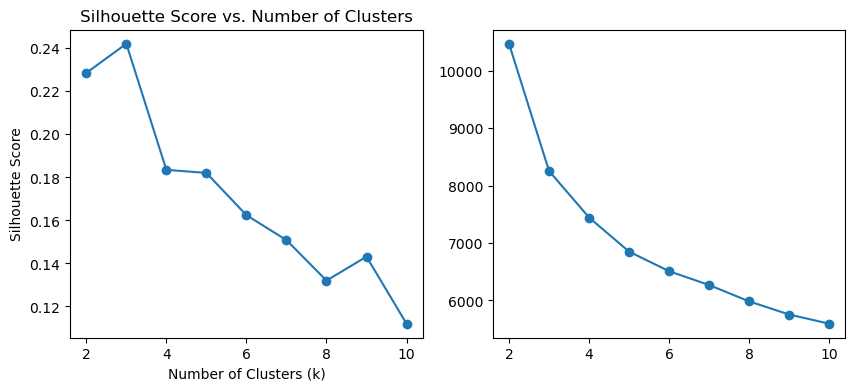

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Part 2
# Load the dataset
college = pd.read_csv('../data/college.csv')

# Select numerical features for clustering
features = college.select_dtypes(include='number')

# Normalize the features
scaler = StandardScaler()
normalized_features = scaler.fit_transform(features)

# Define the range of k values
k_values = range(2, 11)

# Perform clustering for each k value and calculate relevant statistics
silhouette_scores = []
wcss = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(normalized_features)
    silhouette_scores.append(silhouette_score(normalized_features, cluster_labels))
    wcss.append(kmeans.inertia_)

# Visualize the statistics
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Number of Clusters')

plt.subplot(1, 2, 2)
plt.plot(k_values, wcss, marker='o')
plt


In [24]:
college=pd.read_csv('../data/college.csv')

college

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,Worcester State College,No,2197,1515,543,4,26,3089,2029,6797,3900,500,1200,60,60,21.0,14,4469,40
773,Xavier University,Yes,1959,1805,695,24,47,2849,1107,11520,4960,600,1250,73,75,13.3,31,9189,83
774,Xavier University of Louisiana,Yes,2097,1915,695,34,61,2793,166,6900,4200,617,781,67,75,14.4,20,8323,49
775,Yale University,Yes,10705,2453,1317,95,99,5217,83,19840,6510,630,2115,96,96,5.8,49,40386,99
